

# Trabajo - Aranza García

### Fuente
    KAGGEL
    DATA: Google Play Store Apps
    Scrapet: Datos extraídos de la web de 10k aplicaciones de Play Store para analizar el mercado de Android


### Contexto
Si bien muchos conjuntos de datos públicos (en Kaggle y similares) proporcionan datos de la App Store de Apple, no hay muchos conjuntos de datos equivalentes disponibles para las aplicaciones de Google Play Store en la web. Al profundizar, descubrí que la página de la App Store de iTunes implementa una estructura similar a un apéndice bien indexada para permitir un raspado web simple y fácil. Por otro lado, Google Play Store utiliza sofisticadas técnicas modernas (como la carga dinámica de páginas) utilizando JQuery, lo que hace que el scraping sea más desafiante.

### Inspiración
Los datos de las aplicaciones de Play Store tienen un enorme potencial para impulsar al éxito a las empresas de creación de aplicaciones. Se pueden extraer conocimientos prácticos para que los desarrolladores trabajen y capturen el mercado de Android

### Columnas:
Son un total s de 13 columnas:

    App 
    Categoría 
    Calificación 
    Reseñas 
    Tamaño 
    Instalaciones 
    Tipo 
    Precio 
    Contenido Calificación 
    Géneros 
    Última actualización 
    Versión actual 
    Ver Android

## 1. Importamos las librerías necesarias, dataset y damos un primer visual:

In [1]:
import re
import random
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport
from scipy import stats as st

# Propiedad de pandas para visualizar todas las columnas del DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Ignoramos los warnings (para pandas)
warnings.filterwarnings('ignore')

In [2]:
#df = pd.read_csv("googleplaystore.csv")
df = pd.read_csv('googleplaystore.csv')

df.head(10)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   
5     167  5.6M      50,000+  Free     0       Everyone   
6     178   19M      50,000+  Free     0       Everyone   
7   36815   29M   1,000,000+  Free     0       Everyone   
8   13791   33M   1,000,000+  Free     0       Everyone   
9     121  3.1M      10,000+  Free     0       Everyone   

                      Genres        Last Updated         Current Ver  \
0               Art & Design     January 7, 2018               1.0.0   
1  Art & Design;Pretend Play    January 15, 2018               2.0.0   
2               Art & Design      August 1, 2018               1.2.4   
3               Art & Design        June 8, 2018  Varies with device   
4    Art & Design;Creativity       June 20, 2018                 1.1   
5               Art & Design      March 26, 2017                 1.0   
6               Art & Design      April 26, 2018                 1.1   
7               Art & Design       June 14, 2018            6.1.61.1   
8               Art & Design  September 20, 2017               2.9.2   
9    Art & Design;Creativity        July 3, 2018                 2.8   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up  
5    2.3 and up  
6  4.0.3 and up  
7    4.2 and up  
8    3.0 and up  
9  4.0.3 and up

In [3]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
df.drop_duplicates(subset='App', inplace=True)
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


## 2. Report del Dataset:

In [5]:
# Creamos el reporte
profile = ProfileReport(df=df, title='Profiling Report Apps Android', explorative=True)

# Lo exportamos a HTML
profile.to_file("./resultados/Reporte_Apps_Android.html")

# Mostramos el reporte por pantalla
profile

## 3. Límpieza del Dataset e imputación de valores faltantes

A continuación se pasa a realizar las siguientes limpiezas y transformaciones tras el análisis del reporte realizado:


1. Eliminamos las variables (columnas) que tengan un alto porcentaje de desinformación, que estén altamente corelacionada con otra variable o que no sean relevantes. Estos campos serian los siguientes:
    + ***Last Updated***: Variable no relevante para el estudio(Son las ultimas actualizaciones de 2017/2018 de las apps descritas en el estudio)Esta variable sería interesante si tuvieramos los datos de diferentes años para ver la evolución.
    + ***Current Ver*** Variable no relevante para el estudio.
    + ***Android Ver*** Variable no relevante para el estudio.
    

2. Pasamos la columna ***Rating***   completamos con "0" las 1463 Apps que no tienen valoración y en base a los valores del describe(), creamos nueva Columna ***Grado de Valoración*** con valores Alto, Medio y Bajo, segun el describe de la variable Rating.


3. Eliminamos de las Categoría 1.9 que es un error.


4. Pasamos la columna ***Reviews***   a formato númerico y dado que hay valores muy elevados en está columna creamos columna en formato (miles).


5. Pasamos la columna ***Size***   a formato númerico y a su vez pasamos todo a formato Megas.


6. Pasamos la columna ***Installs***   a formato númeric.


7. Pasamos la columna ***Price***   a formato númeric.


8. Para la variable ***Type  y ContentRating*** completamos el valor faltante.


### 3.1 Eliminación columnas:

In [6]:
df=df.drop(['Last Updated','Current Ver','Android Ver'],1).copy()

### 3.2 Completamos los datos faltantes de Rating y generamos nueva columna con el Grado de Valoración

In [7]:
df.describe()

Rating
count  8197.000000
mean      4.175052
std       0.561026
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

Viendo que el percentil del 25% está en una valoraciónde 4 y percentil del 75% en una valoración de 4,5.
Media 4,17  vs Mediana 4,30
Creamos nueva conlumna con grado de valoración en base a estos resultados, marcando:
Nivel alto más de 4,5
NiveL medio entre 4 y menos de 4,5
Nivel Bajo menos de 4 y las no valoradas

#### Tenemos un total de 1463 aplicacines sin Valoración.
### El 65% superan un Rating de 4.


In [8]:
df['Rating'] = df['Rating'].fillna(0)

In [9]:
df['Grado_Valoracion']=df.apply(lambda 
                                   row:1 if row.Rating>=4.5
                                  else(2 if row.Rating>=4 and row.Rating<4.5
                                      else 3)
                                  ,axis=1)

df.sample(10)

App       Category  \
4962                       Weather & Radar Pro - Ad-Free        WEATHER   
1570   Horoscopes – Daily Zodiac Horoscope and Astrology      LIFESTYLE   
10162                                      EZ Screenshot          TOOLS   
9846                                Beauty and the Beast         FAMILY   
344                       Firefox Browser fast & private  COMMUNICATION   
6963                       Car Driving Simulator Citroen         FAMILY   
8748                       The Walking Zombie: Dead City           GAME   
3927                                          4 in a row           GAME   
5717                                        AV Phonetics         FAMILY   
8579                                             Otto DM         SOCIAL   

       Rating  Reviews                Size      Installs  Type  Price  \
4962      4.5    25243                 26M      100,000+  Paid  $2.99   
1570      4.6   161143                 11M   10,000,000+  Free      0   
10162     4.4       55                1.4M        5,000+  Free      0   
9846      4.4    70883                 31M    1,000,000+  Free      0   
344       4.4  3075028  Varies with device  100,000,000+  Free      0   
6963      3.8      174                 44M       10,000+  Free      0   
8748      4.6    58575                 96M    1,000,000+  Free      0   
3927      4.3    47698                4.1M    5,000,000+  Free      0   
5717      4.3      259                 49M       10,000+  Free      0   
8579      0.0        0                2.4M           10+  Free      0   

      Content Rating             Genres  Grado_Valoracion  
4962        Everyone            Weather                 1  
1570    Everyone 10+          Lifestyle                 1  
10162       Everyone              Tools                 2  
9846        Everyone  Puzzle;Creativity                 2  
344         Everyone      Communication                 2  
6963        Everyone         Simulation                 3  
8748            Teen             Action                 1  
3927        Everyone              Board                 2  
5717        Everyone          Education                 2  
8579            Teen             Social                 3

In [45]:
df_categorias=df.groupby(['Category','Grado_Valoracion'])['Grado_Valoracion'].agg(['count'])
df_categorias.sort_values(by='count',ascending=False).sample(5)

count
Category       Grado_Valoracion       
ART_AND_DESIGN 1                    26
WEATHER        2                    34
               1                    22
VIDEO_PLAYERS  3                    68
FAMILY         2                   709

### 3.3 Eliminamos categoría errónea 1.9

In [11]:
df = df.drop(df[df['Category']=='1.9'].index)

### 3.4. Pasamos la columna ***Reviews***   a formato númerico yc reamos columna con formato (miles)

In [12]:
df = df.drop(df[df['Reviews']=='3.0M'].index)

In [13]:
df["Reseñas_miles"] = (pd.to_numeric(df["Reviews"], downcast="float"))/1000

In [14]:
df=df.drop(['Reviews'],1).copy()

In [15]:
df.sample(5)

App            Category  \
8609                                   Svenska Dagbladet  NEWS_AND_MAGAZINES   
1608                      My Day - Countdown Calendar 🗓️           LIFESTYLE   
10031                                Subway Simulator 3D              FAMILY   
89     Zona Azul Digital Fácil SP CET - OFFICIAL São ...   AUTO_AND_VEHICLES   
503                     Once - Quality Matches Every day              DATING   

       Rating                Size    Installs  Type Price Content Rating  \
8609      2.6  Varies with device    100,000+  Free     0       Everyone   
1608      4.1                 13M  1,000,000+  Free     0       Everyone   
10031     4.0                 62M  1,000,000+  Free     0       Everyone   
89        4.6  Varies with device    100,000+  Free     0       Everyone   
503       4.4                 21M  1,000,000+  Free     0     Mature 17+   

                 Genres  Grado_Valoracion  Reseñas_miles  
8609   News & Magazines                 3       0.820000  
1608          Lifestyle                 2      49.146999  
10031        Simulation                 2      25.489000  
89      Auto & Vehicles                 1       7.880000  
503              Dating                 2     222.888000

### 3.5 Pasamos la columna Size a formato númerico y a su vez pasamos todo a formato Megas

In [16]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)


df['Size'] = df['Size'].apply(lambda x: float(x))

In [17]:
df['Size'] = df['Size'].fillna(0)

In [18]:
df.sample(5)

App            Category  \
231                     Tiny Scanner - PDF Scanner App            BUSINESS   
587   Mingle - Online Dating App to Chat & Meet People              DATING   
9647                                        The EO Bar  HEALTH_AND_FITNESS   
3236                                      Moto Display               TOOLS   
4388                                         Tap N Pay        PRODUCTIVITY   

      Rating  Size     Installs  Type  Price Content Rating            Genres  \
231      4.7  39.0  10,000,000+  Free      0       Everyone          Business   
587      4.1  38.0   1,000,000+  Free      0     Mature 17+            Dating   
9647     4.7  34.0      10,000+  Paid  $6.99       Everyone  Health & Fitness   
3236     4.2   0.0  10,000,000+  Free      0       Everyone             Tools   
4388     4.4   8.2      10,000+  Free      0       Everyone      Productivity   

      Grado_Valoracion  Reseñas_miles  
231                  1     286.897003  
587                  2      15.081000  
9647                 1       0.416000  
3236                 2      18.239000  
4388                 2       0.253000

### 3.6 Pasamos la columna Installs a formato númeric.

In [19]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [20]:
df.sample(5)

App         Category  Rating    Size  \
492    eharmony - Online Dating App           DATING     3.1  53.000   
8807                      nds4droid             GAME     3.4   8.800   
7371                 Valmet CI Tool         BUSINESS     0.0   3.700   
10690                      FO Bixby  PERSONALIZATION     5.0   0.861   
5536                      Egg, Inc.           FAMILY     4.7  29.000   

       Installs  Type  Price Content Rating           Genres  \
492     5000000  Free      0     Mature 17+           Dating   
8807   10000000  Free      0       Everyone           Arcade   
7371        500  Free      0       Everyone         Business   
10690       100  Paid  $0.99       Everyone  Personalization   
5536    5000000  Free      0       Everyone       Simulation   

       Grado_Valoracion  Reseñas_miles  
492                   3      31.320000  
8807                  3     107.778000  
7371                  3       0.001000  
10690                 1       0.005000  
5536                  1     580.159973

### 3.7 Pasamos la columna Price a formato númerico

In [21]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

In [22]:
df.sample(5)

App            Category  Rating  Size  \
9828              Égalité et Réconciliation  NEWS_AND_MAGAZINES     4.9   3.8   
7586         Teeny Titans - Teen Titans Go!              FAMILY     4.6  25.0   
523   Sugar Mommas Dating And Single Search              DATING     3.5  13.0   
1082                          People's Bank             FINANCE     3.6  46.0   
9630         Orfox: Tor Browser for Android       COMMUNICATION     4.2  31.0   

      Installs  Type  Price Content Rating                       Genres  \
9828       500  Paid   2.99       Everyone             News & Magazines   
7586    100000  Paid   3.99   Everyone 10+  Strategy;Action & Adventure   
523    1000000  Free   0.00     Mature 17+                       Dating   
1082   1000000  Free   0.00       Everyone                      Finance   
9630  10000000  Free   0.00       Everyone                Communication   

      Grado_Valoracion  Reseñas_miles  
9828                 1       0.058000  
7586                 1      20.462999  
523                  3       1.972000  
1082                 3      10.697000  
9630                 2      44.233002

### 3.8 Para la variable Type y ContentRating completamos el valor faltante

In [23]:
df['Type'].value_counts()

Free    8902
Paid     756
Name: Type, dtype: int64

In [24]:
df['Type'] = df['Type'].fillna('Free')

In [25]:
df['Content Rating'] = df['Content Rating'].apply(lambda x: x.replace('Unrated', 'Everyone') if 'Unrated' in str(x) else x)

In [26]:
df['Content Rating'].value_counts()

Everyone           7905
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Name: Content Rating, dtype: int64

In [27]:
# Creamos el reporte
profile = ProfileReport(df=df, title='Profiling Report Apps Android', explorative=True)

# Lo exportamos a HTML
profile.to_file("./resultados/Reporte_Apps_Android_corregido.html")

# Mostramos el reporte por pantalla
profile

# ANALISIS POR Nº DE DESCARGAS

In [28]:
TOP30_NInstalacion=df[['App','Category','Rating','Installs','Type','Grado_Valoracion','Reseñas_miles']]
TOP30_NInstalacion.sort_values(by='Installs',ascending=False).head(30)

App             Category  Rating  \
336                         WhatsApp Messenger        COMMUNICATION     4.4   
152                          Google Play Books  BOOKS_AND_REFERENCE     3.9   
1654                            Subway Surfers                 GAME     4.5   
3117                 Maps - Navigate & Explore     TRAVEL_AND_LOCAL     4.3   
340                                      Gmail        COMMUNICATION     4.3   
2545                                 Instagram               SOCIAL     4.5   
2544                                  Facebook               SOCIAL     4.1   
338               Google Chrome: Fast & Secure        COMMUNICATION     4.3   
2554                                   Google+               SOCIAL     4.2   
3665                                   YouTube        VIDEO_PLAYERS     4.3   
3127                        Google Street View     TRAVEL_AND_LOCAL     4.2   
3234                                    Google                TOOLS     4.4   
3454                              Google Drive         PRODUCTIVITY     4.4   
865                          Google Play Games        ENTERTAINMENT     4.3   
2808                             Google Photos          PHOTOGRAPHY     4.5   
335   Messenger – Text and Video Chat for Free        COMMUNICATION     4.0   
3736                               Google News   NEWS_AND_MAGAZINES     3.9   
3687                   Google Play Movies & TV        VIDEO_PLAYERS     3.7   
391              Skype - free IM & video calls        COMMUNICATION     4.1   
341                                   Hangouts        COMMUNICATION     4.0   
1722                            My Talking Tom                 GAME     4.5   
1662                                       Pou                 GAME     4.3   
342                            Viber Messenger        COMMUNICATION     4.3   
3473                                   Dropbox         PRODUCTIVITY     4.4   
1661                              Temple Run 2                 GAME     4.3   
347              imo free video calls and chat        COMMUNICATION     4.3   
3574                               Cloud Print         PRODUCTIVITY     4.1   
403                LINE: Free Calls & Messages        COMMUNICATION     4.2   
3755              Flipboard: News For Our Time   NEWS_AND_MAGAZINES     4.4   
371      Google Duo - High Quality Video Calls        COMMUNICATION     4.6   

        Installs  Type  Grado_Valoracion  Reseñas_miles  
336   1000000000  Free                 2   69119.312500  
152   1000000000  Free                 3    1433.233032  
1654  1000000000  Free                 1   27722.263672  
3117  1000000000  Free                 2    9235.155273  
340   1000000000  Free                 2    4604.324219  
2545  1000000000  Free                 1   66577.312500  
2544  1000000000  Free                 2   78158.304688  
338   1000000000  Free                 2    9642.995117  
2554  1000000000  Free                 2    4831.125000  
3665  1000000000  Free                 2   25655.304688  
3127  1000000000  Free                 2    2129.688965  
3234  1000000000  Free                 2    8033.493164  
3454  1000000000  Free                 2    2731.170898  
865   1000000000  Free                 2    7165.361816  
2808  1000000000  Free                 1   10858.555664  
335   1000000000  Free                 2   56642.847656  
3736  1000000000  Free                 3     877.635010  
3687  1000000000  Free                 3     906.383972  
391   1000000000  Free                 2   10484.168945  
341   1000000000  Free                 2    3419.249023  
1722   500000000  Free                 1   14891.222656  
1662   500000000  Free                 2   10485.307617  
342    500000000  Free                 2   11334.798828  
3473   500000000  Free                 2    1861.310059  
1661   500000000  Free                 2    8118.608887  
347    500000000  Free                 2    4785.892090  
3574   500000000  Free     

<p>
En las Apps con más de 1000 Millones de Descargas, salvo el juego Subway Surfers, el resto son Apps de Redes sociales, canales habituales usados para comunicarnos y Buscadores Google
</p>

<figure>
  <img src="Imagenes/Subway Surfers.jpg"
       alt="Imagen del juego Subway Surfers.jpg" width="400">
</figure>

<hr></hr>
<p><strong>Realizamos Filtro del Data Set sin categorias: SOCIAL, COMMUNICATION Y DESCARGAS inferiores a 1000 Millones
</strong></p> 

In [29]:
df_sinRRSS=df[((df.Category!="SOCIAL")&(df.Category!="COMMUNICATION")&(df.Installs<1000000000))]

In [30]:
TOP10_NInstalacionNuevo=df_sinRRSS[['App','Category','Rating','Installs','Type','Grado_Valoracion','Reseñas_miles']]
TOP10_NInstalacionNuevo.sort_values(by='Installs',ascending=False).head(10)

App            Category  \
1661                                       Temple Run 2                GAME   
3255                         SHAREit - Transfer & Share               TOOLS   
3473                                            Dropbox        PRODUCTIVITY   
1655                                   Candy Crush Saga                GAME   
3265                       Gboard - the Google Keyboard               TOOLS   
7536  Security Master - Antivirus, VPN, AppLock, Boo...               TOOLS   
4005            Clean Master- Space Cleaner & Antivirus               TOOLS   
3235                                   Google Translate               TOOLS   
3739                                            Twitter  NEWS_AND_MAGAZINES   
3476                                    Google Calendar        PRODUCTIVITY   

      Rating   Installs  Type  Grado_Valoracion  Reseñas_miles  
1661     4.3  500000000  Free                 2    8118.608887  
3255     4.6  500000000  Free                 1    7790.692871  
3473     4.4  500000000  Free                 2    1861.310059  
1655     4.4  500000000  Free                 2   22426.675781  
3265     4.2  500000000  Free                 2    1859.114990  
7536     4.7  500000000  Free                 1   24901.000000  
4005     4.7  500000000  Free                 1   42916.527344  
3235     4.4  500000000  Free                 2    5745.092773  
3739     4.3  500000000  Free                 2   11667.403320  
3476     4.2  500000000  Free                 2     858.208008

In [31]:
df_sinRRSS_porcategorias=df_sinRRSS.groupby(['Category'])['Installs']\
                    .agg(['count','sum'])\
                    .reset_index()
df_sinRRSS_porcategorias_numero=df_sinRRSS_porcategorias.sort_values(['count'], ascending=[False])
df_sinRRSS_porcategorias_numero=df_sinRRSS_porcategorias_numero.head(10).copy()


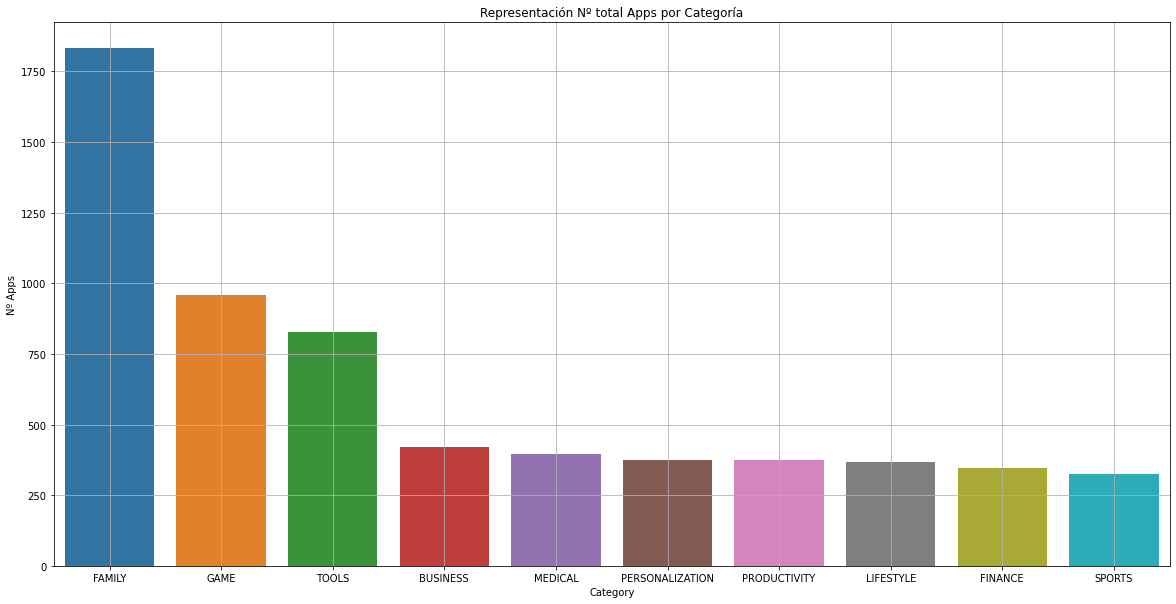

In [32]:
fig, ax = plt.subplots(figsize = (20 , 10))
sns.barplot(x='Category',y='count', data=df_sinRRSS_porcategorias_numero,ax=ax)
plt.title('Representación Nº total Apps por Categoría')
plt.ylabel('Nº Apps')
plt.xlabel('Category')
plt.grid()

### Family, Game y Tools son las categorías con mayor nº de Apps, sin embargo si miramos en este caso el nº de descargas:

In [33]:
df_sinRRSS_porcategorias=df_sinRRSS.groupby(['Category'])['Installs']\
                    .agg(['count','sum'])\
                    .reset_index()
df_sinRRSS_porcategorias_descargas=df_sinRRSS_porcategorias.sort_values(['sum'], ascending=[False])
df_sinRRSS_porcategorias_descargas=df_sinRRSS_porcategorias_descargas.head(10).copy()

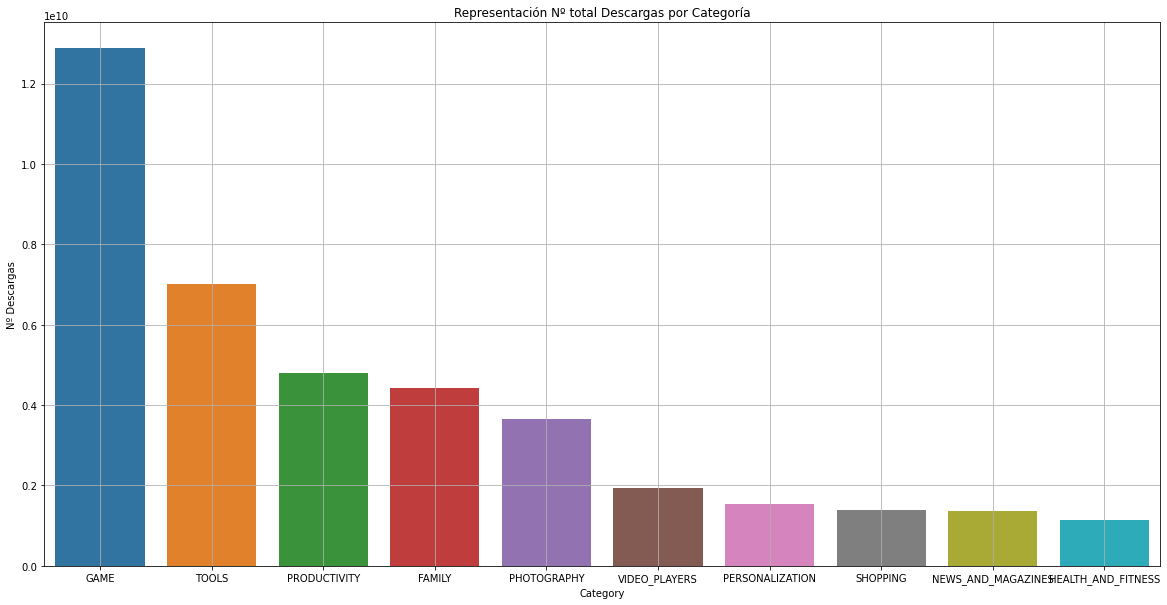

In [34]:
fig, ax = plt.subplots(figsize = (20 , 10))
sns.barplot(x='Category',y='sum', data=df_sinRRSS_porcategorias_descargas,ax=ax)
plt.title('Representación Nº total Descargas por Categoría')
plt.ylabel('Nº Descargas')
plt.xlabel('Category')
plt.grid()

<hr></hr>
<p><strong>Conclusión 1:</strong></p>

<figure>
  <img src="Imagenes/Conclusion1.png"
       alt="Conclusion1.png" width="950">
</figure>

<hr></hr>

## Finalmente por nº de descargas las categorías  con mejores datos son: 1ª: Game, 2ª:Tools, 3ª: Productivity y 4ª:Family. 
### Categorías como Business y Medicals, ya nos están entre las 10 con mayor nº de descargas y aparece Photography.

# ANALISIS APPS PAGO

### TOP 10 Más Caras

In [35]:
df_pago=df[(df.Type=="Paid")]
df_pago.sort_values(by='Price',ascending=False).head(10)

App   Category  Rating    Size  Installs  \
4367        I'm Rich - Trump Edition  LIFESTYLE     3.6   7.300     10000   
5373              I AM RICH PRO PLUS    FINANCE     4.0  41.000      1000   
4362                      💎 I'm rich  LIFESTYLE     3.8  26.000     10000   
5369                       I am Rich    FINANCE     4.3   3.800      5000   
5364  I am rich (Most expensive app)    FINANCE     4.1   2.700      1000   
5362                   I Am Rich Pro     FAMILY     4.4   2.700      5000   
5359              I am rich(premium)    FINANCE     3.5   0.965      5000   
4197          most expensive app (H)     FAMILY     4.3   1.500       100   
5356               I Am Rich Premium    FINANCE     4.1   4.700     50000   
5354                  I am Rich Plus     FAMILY     4.0   8.700     10000   

      Type   Price Content Rating         Genres  Grado_Valoracion  \
4367  Paid  400.00       Everyone      Lifestyle                 3   
5373  Paid  399.99       Everyone        Finance                 2   
4362  Paid  399.99       Everyone      Lifestyle                 3   
5369  Paid  399.99       Everyone        Finance                 2   
5364  Paid  399.99           Teen        Finance                 2   
5362  Paid  399.99       Everyone  Entertainment                 2   
5359  Paid  399.99       Everyone        Finance                 3   
4197  Paid  399.99       Everyone  Entertainment                 2   
5356  Paid  399.99       Everyone        Finance                 2   
5354  Paid  399.99       Everyone  Entertainment                 2   

      Reseñas_miles  
4367          0.275  
5373          0.036  
4362          0.718  
5369          0.180  
5364          0.129  
5362          0.201  
5359          0.472  
4197          0.006  
5356          1.867  
5354          0.856

In [36]:
df_pago_porcategorias=df_pago.groupby(['Category'])['Installs']\
                    .agg(['count','sum'])\
                    .reset_index()
df_pago_porcategorias_numero=df_pago_porcategorias.sort_values(['count'], ascending=[False])
df_pago_porcategorias_numero=df_pago_porcategorias_numero.head(10).copy()

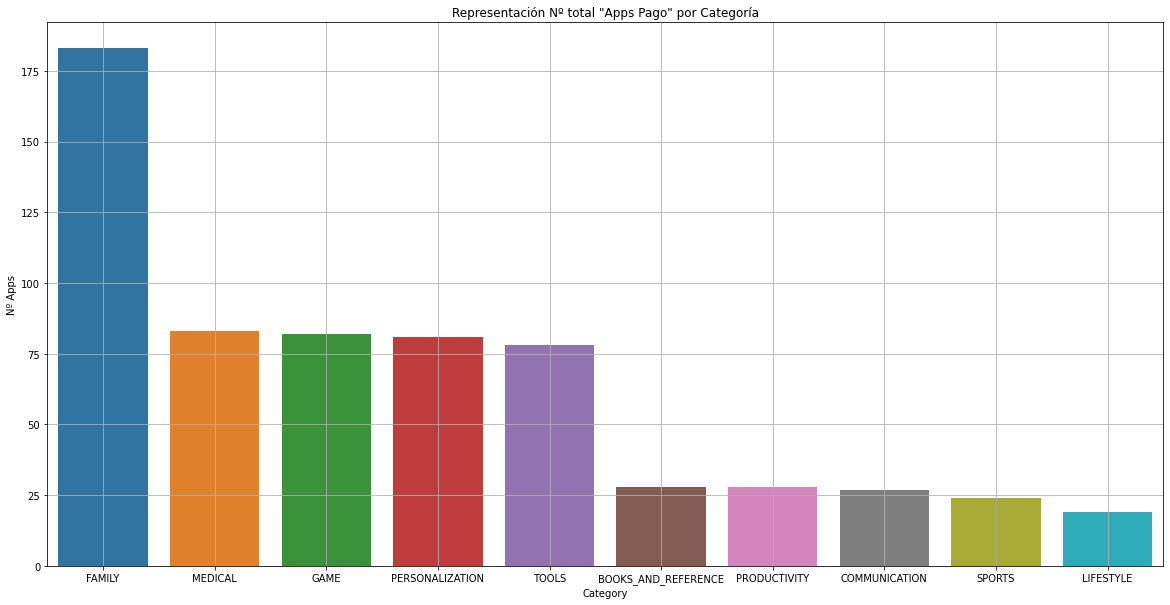

In [37]:
fig, ax = plt.subplots(figsize = (20 , 10))
sns.barplot(x='Category',y='count', data=df_pago_porcategorias_numero,ax=ax)
plt.title('Representación Nº total "Apps Pago" por Categoría')
plt.ylabel('Nº Apps')
plt.xlabel('Category')
plt.grid()

### Por nº de APPS, las 10 mejores categorías por las que la gente está dispuesta a pagar son: Family y Medical, Game, Personalization y Tools con número de Apps similares.

In [38]:
df_pago_porcategorias=df_pago.groupby(['Category'])['Installs']\
                    .agg(['count','sum'])\
                    .reset_index()
df_pago_porcategorias_install=df_pago_porcategorias.sort_values(['sum'], ascending=[False])
df_pago_porcategorias_install=df_pago_porcategorias_install.head(10).copy()

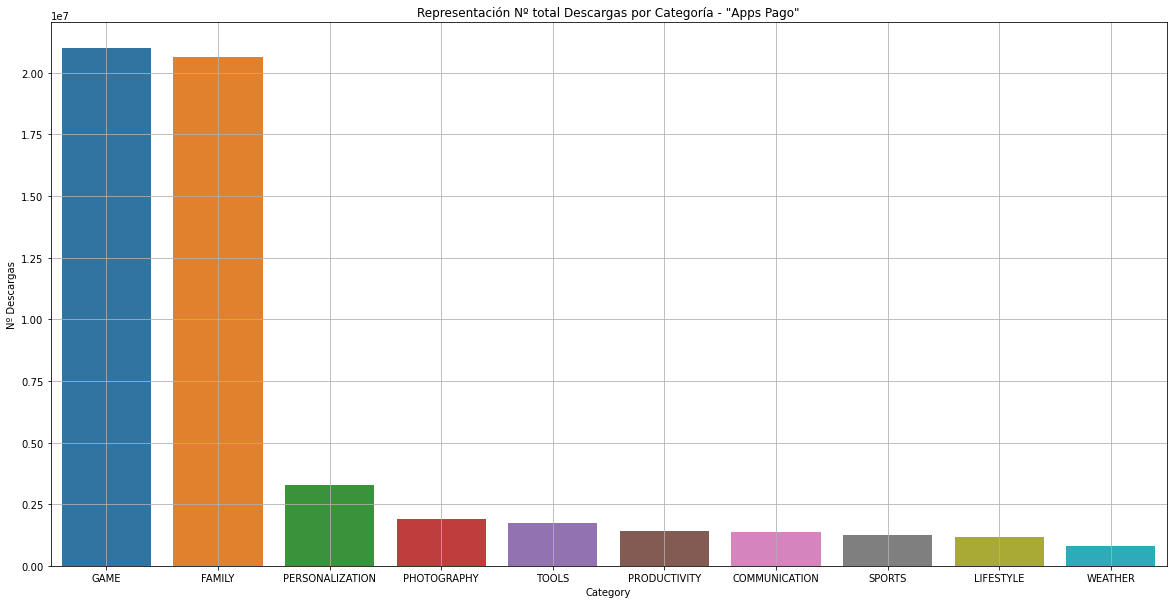

In [39]:
fig, ax = plt.subplots(figsize = (20 , 10))
sns.barplot(x='Category',y='sum', data=df_pago_porcategorias_install,ax=ax)
plt.title('Representación Nº total Descargas por Categoría - "Apps Pago"')
plt.ylabel('Nº Descargas')
plt.xlabel('Category')
plt.grid()

<hr></hr>
<p><strong>Conclusión 2:</strong></p>

<figure>
  <img src="Imagenes/Conclusion2.png"
       alt="Conclusion2.png" width="950">
</figure>

<hr></hr>

## Finalmente en el caso de Apps de Pago - por nº de descargas las categorías con mejores datos son: 1ª: Game y 2ª:Famly con datos muy elevados frentre al resto de catecorias.
### La categoría  Medicals  ya no está entre las 10 con mayor nº de descargas y aparece Photography que por nº no aparecía.

# Análisis Apps Pago por Reseñas y Rating

In [40]:
df_pago_porResenas=df_pago.groupby(['Category'])['Reseñas_miles']\
                    .agg(['sum','count'])\
                    .reset_index()
df_pago_porResenas=df_pago_porResenas.sort_values(['sum'], ascending=[False])
df_pago_porResenas=df_pago_porResenas.head(10).copy()

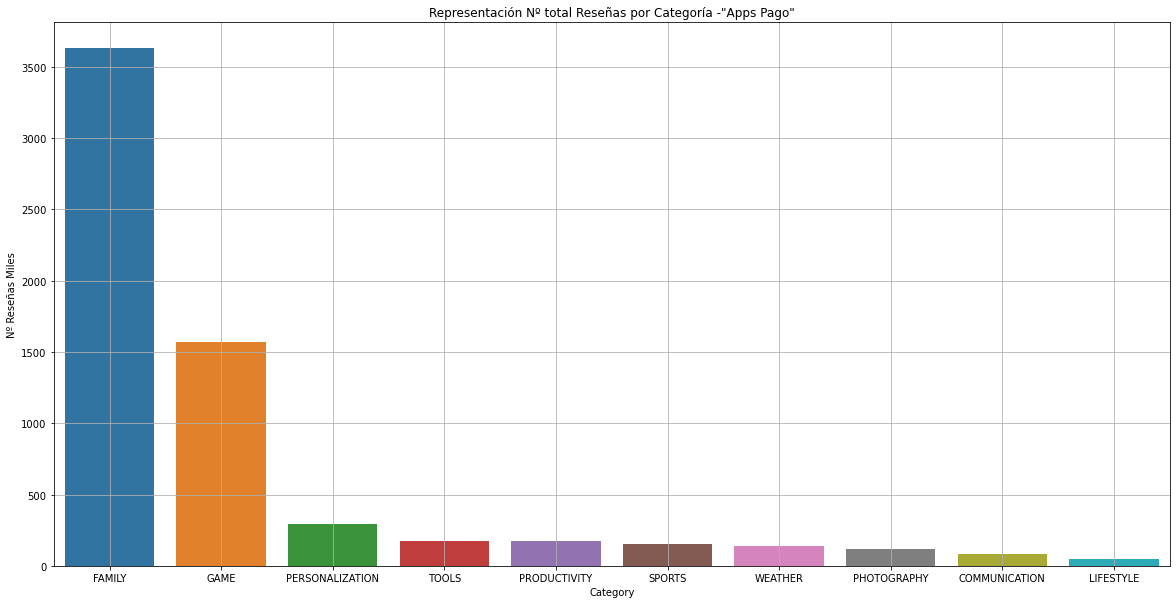

In [41]:
fig, ax = plt.subplots(figsize = (20 , 10))
sns.barplot(x='Category',y='sum', data=df_pago_porResenas,ax=ax)
plt.title('Representación Nº total Reseñas por Categoría -"Apps Pago"')
plt.ylabel('Nº Reseñas Miles')
plt.xlabel('Category')
plt.grid()

In [42]:
df_pago_porRating=df_pago.groupby(['Category'])['Rating']\
                    .agg(['mean','median','std','count'])\
                    .reset_index()
df_pago_porRating=df_pago_porRating.sort_values(['median'], ascending=[False])
df_pago_porRating=df_pago_porRating.head(15).copy()

In [43]:
df_pago_porRating

Category      mean  median       std  count
18  NEWS_AND_MAGAZINES  4.800000    4.80  0.141421      2
0       ART_AND_DESIGN  4.733333    4.70  0.057735      3
6            EDUCATION  4.750000    4.70  0.100000      4
7        ENTERTAINMENT  4.600000    4.60  0.000000      2
23            SHOPPING  4.500000    4.50  0.424264      2
29             WEATHER  3.825000    4.50  1.590822      8
12                GAME  4.052439    4.40  1.196623     82
13  HEALTH_AND_FITNESS  3.220000    4.40  2.033716     15
11      FOOD_AND_DRINK  4.350000    4.35  0.353553      2
25              SPORTS  3.900000    4.35  1.242718     24
15           LIFESTYLE  4.026316    4.30  1.122914     19
9               FAMILY  3.604918    4.30  1.656797    183
20     PERSONALIZATION  3.569136    4.30  1.811328     81
28       VIDEO_PLAYERS  4.100000    4.25  0.716473      4
26               TOOLS  3.367949    4.20  1.751919     78

<hr></hr>
<p><strong>Conclusión 3:</strong></p>

<figure>
  <img src="Imagenes/Conclusion3.png"
       alt="Conclusion3.png" width="950">
</figure>

<hr></hr>

### Centrándonos en las dos categorías con mayor nº de reseñas, su valoración es algo mejor en Game sobre Family ( ambas dos con desviaciones elevadas algo mayor desviación en Family -> con posibilidad de bajas puntuaciones o nulas que hacen crecer esta desviación).